COPYRIGHT © 2018 Kiran Arun <kironni@gmail.com>

### Setup

In [1]:
# install dependencies
!rm -r Neural_Networks-101-demo
!git clone -b explanations https://github.com/KiranArun/Neural_Networks-101-demo.git
!python3 /content/Neural_Networks-101-demo/scripts/setup.py helper_funcs

Cloning into 'Neural_Networks-101-demo'...
remote: Counting objects: 352, done.
remote: Compressing objects: 100% (67/67), done.
remote: Total 352 (delta 30), reused 57 (delta 14), pack-reused 271
Receiving objects: 100% (352/352), 7.53 MiB | 20.12 MiB/s, done.
Resolving deltas: 100% (153/153), done.
Getting helper functions...


# MNIST Handwriten Digits Classifier

In [2]:
import keras                       # import keras using tf backend
import numpy as np
import matplotlib.pyplot as plt

import helper_funcs as helper

Using TensorFlow backend.


In [3]:
# this is the directory where we will keep and external files, eg. data, logs
model_root_dir = '/content/'

# get data
mnist = helper.MNIST_data(model_root_dir+'MNIST_data/')

Download complete.
Save complete.


In [0]:
image_dims = (28,28)
num_classes = 10

batch_size = 100
learning_rate = 0.2
dropout_rate = 0.4

epochs = 2

In [5]:
# reset session to rebuild model without building another one
keras.backend.clear_session()

# create model
model = keras.models.Sequential()

# define convolutional layer 1 with relu
model.add(keras.layers.Conv2D(filters=8, kernel_size=(5,5), activation='relu', input_shape=(*image_dims,1)))
# add a max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

# define convolutional layer 2 with relu
model.add(keras.layers.Conv2D(filters=16, kernel_size=(5,5), activation='relu'))
# add a max pooling layer
model.add(keras.layers.MaxPool2D(pool_size=(2,2), strides=2))

# flatten
model.add(keras.layers.Flatten())

# add a hidden fully connected layer
model.add(keras.layers.Dense(units=256, activation='relu'))
# add dropout
model.add(keras.layers.Dropout(rate=dropout_rate))

# add output fc layer
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

# show model structure
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 8)         208       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 16)          3216      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 16)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)               65792     
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
__________

In [0]:
# define loss function
# define optimizer
# also return accuracy as a performance metric
model.compile(loss='categorical_crossentropy',
              optimizer=keras.optimizers.SGD(lr=learning_rate),
              metrics=['accuracy'])

In [7]:
# train model
history = model.fit(mnist.train_images.reshape(-1,*image_dims,1), mnist.train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(mnist.validation_images.reshape(-1,*image_dims,1), mnist.validation_labels))

Train on 55000 samples, validate on 5000 samples
Epoch 1/2
55000/55000 [==============================] - 6s 110us/step - loss: 0.2865 - acc: 0.9071 - val_loss: 0.0701 - val_acc: 0.9786
Epoch 2/2
55000/55000 [==============================] - 5s 86us/step - loss: 0.0893 - acc: 0.9718 - val_loss: 0.0508 - val_acc: 0.9846


In [8]:
# show evaluation accuracy
score = model.evaluate(mnist.test_images.reshape(-1,*image_dims,1), mnist.test_labels, verbose=0)
print('Test accuracy:', str(round(100*score[1],2))+'%')

Test accuracy: 98.23%


prediction: 4 answer: 4
0 0.002%
1 0.0%
2 0.001%
3 0.0%
4 99.925%
5 0.0%
6 0.0%
7 0.002%
8 0.0%
9 0.069%


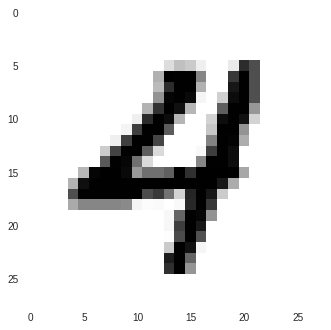

prediction: 7 answer: 7
0 0.0%
1 0.005%
2 0.022%
3 0.012%
4 0.0%
5 0.0%
6 0.0%
7 99.956%
8 0.0%
9 0.004%


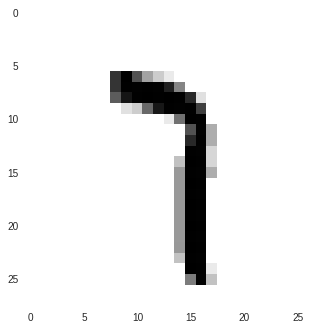

In [9]:
# test and show test images
test_idxs = [1,11]

for test_idx in test_idxs:
    test_x, test_y = mnist.test_images[test_idx].reshape(1,*image_dims,1), mnist.test_labels[test_idx].reshape(1,-1)

    _prediction = model.predict(test_x)

    print('prediction:', np.argmax(_prediction), 'answer:', np.argmax(test_y))

    for i,val in enumerate(_prediction[0]):
        print(i, str(round((100*val),3))+'%')

    plt.imshow(test_x.reshape(*image_dims), cmap='binary')
    plt.grid(False)
    plt.show()